# K-Means Clustering

**K-Means is an unsupervised learning algorithm that partitions data into a fixed number of clusters by minimizing the distance between data points and cluster centers.**

---

## 🔹 Step 1: Initialization  
- **Randomly pick $k$ points from the dataset as initial cluster centroids.**
- **These centroids serve as the starting reference for each cluster.**

---

## 🔹 Step 2: Cluster Assignment  
- **Each point is assigned to the cluster whose centroid is closest (typically using Euclidean distance).**  
- **We denote the index of the closest centroid to a point $x^{(i)}$ as $c^{(i)}$.**

---

## 🔹 Step 3: Centroid Update  
- **For each cluster, we recompute its centroid by taking the average of all data points assigned to it.**
- **This new mean becomes the updated center for the cluster.**

---

## 🎯 Optimization Objective  

**The algorithm minimizes the total within-cluster variance, or distortion cost, given by:**

$$
J = \sum_{i=1}^{m} \left\| x^{(i)} - \mu_{c^{(i)}} \right\|^2
$$

Where:  
- $m$ is the total number of data points,  
- $x^{(i)}$ is the $i$-th data point,  
- $\mu_{c^{(i)}}$ is the centroid of the cluster assigned to $x^{(i)}$.

---

## 🔁 Iteration & Convergence  
- **Steps 2 and 3 are repeated until convergence, either when centroids stabilize or a predefined iteration limit is reached.**




In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [10]:
df = pd.read_csv("../data/iris.csv")
df.drop('Id',inplace=True,axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X = df.iloc[:, :-1].to_numpy() 
y = df.iloc[:, -1].to_numpy()   

<a id="4"></a>
<h1 style='background:#00EFFF;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '

# Comparing

In [71]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans as SklearnKMeans
from mlfs.kmeans import KMeans as CustomKMeans  

def compare_kmeans_plot(X, n_clusters=3, max_iter=10):
    """
    Compare clustering results of custom and sklearn KMeans using Plotly subplots.

    Parameters
    ----------
    X : np.ndarray
        Feature matrix (2D, for visualization).
    n_clusters : int
        Number of clusters to form.
    max_iter : int
        Maximum number of iterations for both models.
    """

    # === Custom KMeans ===
    custom_model = CustomKMeans(n_clusters=n_clusters, iterations=max_iter)
    centroids_custom, labels_custom = custom_model.fit(X)

    # === Sklearn KMeans ===
    sklearn_model = SklearnKMeans(n_clusters=n_clusters, n_init=10, max_iter=max_iter, random_state=42)
    labels_sklearn = sklearn_model.fit_predict(X)
    centroids_sklearn = sklearn_model.cluster_centers_

    # === Plotting ===
    fig = make_subplots(rows=1, cols=2, subplot_titles=["Custom KMeans", "Sklearn KMeans"])

    for cid in np.unique(labels_custom):
        fig.add_trace(go.Scatter(
            x=X[labels_custom == cid, 0], y=X[labels_custom == cid, 1],
            mode='markers', name=f'Custom Cluster {cid}', legendgroup=f'c{cid}'
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=centroids_custom[:, 0], y=centroids_custom[:, 1],
        mode='markers', marker=dict(symbol='x', size=12, color='lime'),
        name='Custom Centroids', legendgroup='centroids'
    ), row=1, col=1)

    for cid in np.unique(labels_sklearn):
        fig.add_trace(go.Scatter(
            x=X[labels_sklearn == cid, 0], y=X[labels_sklearn == cid, 1],
            mode='markers', name=f'Sklearn Cluster {cid}', legendgroup=f's{cid}', showlegend=False
        ), row=1, col=2)

    fig.add_trace(go.Scatter(
        x=centroids_sklearn[:, 0], y=centroids_sklearn[:, 1],
        mode='markers', marker=dict(symbol='x', size=12, color='lightblue'),
        name='Sklearn Centroids', legendgroup='centroids', showlegend=False
    ), row=1, col=2)

    fig.update_layout(
        template="plotly_dark",
        width=1000,
        height=500,
        title="Comparison of Custom vs Sklearn KMeans"
    )

    fig.show()


In [72]:
compare_kmeans_plot(X, n_clusters=3)

In [68]:
X, y = make_blobs(n_samples=300, centers=3, cluster_std=2.5, random_state=0)
compare_kmeans_plot(X, n_clusters=3)

In [73]:
X = df.iloc[:, :-1].to_numpy() 
y = df.iloc[:, -1].to_numpy()   

In [43]:
def compare_kmeans_time_from_data(X, n_clusters=3, n_init=10, max_iter=300):
    """
    Compares training and prediction time of custom vs sklearn KMeans.

    Returns:
    --------
    pd.DataFrame
    """
    import time
    import pandas as pd
    from mlfs.kmeans import KMeans as CustomKMeans
    from sklearn.cluster import KMeans as SklearnKMeans

    # Custom KMeans
    custom_model = CustomKMeans(n_clusters=n_clusters, iterations=max_iter)
    start = time.time()
    _, _ = custom_model.fit(X)
    fit_custom = time.time() - start

    start = time.time()
    _ = custom_model.predict(X)
    predict_custom = time.time() - start

    # Sklearn KMeans
    sklearn_model = SklearnKMeans(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter, random_state=42)
    start = time.time()
    sklearn_model.fit(X)
    fit_sklearn = time.time() - start

    start = time.time()
    _ = sklearn_model.predict(X)
    predict_sklearn = time.time() - start

    return pd.DataFrame({
        "Model": ["CustomKMeans", "SklearnKMeans"],
        "FitTime (s)": [fit_custom, fit_sklearn],
        "PredictTime (s)": [predict_custom, predict_sklearn]
    })


In [44]:
timing_df = compare_kmeans_time_from_data(X=X, n_clusters=3)
print("\n⏱️ Porównanie czasu:")
print(timing_df)



⏱️ Porównanie czasu:
           Model  FitTime (s)  PredictTime (s)
0   CustomKMeans     0.971678         0.002621
1  SklearnKMeans     0.023500         0.000265


In [46]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from mlfs.kmeans import KMeans as CustomKMeans
from sklearn.cluster import KMeans as SklearnKMeans
import time
import pandas as pd
def benchmark_kmeans_scalability(sample_sizes, n_clusters=3, n_features=4, max_iter=100):
    """
    Benchmarks training time of CustomKMeans vs SklearnKMeans for increasing sample sizes.

    Returns:
    --------
    pd.DataFrame
    """


    records = []

    for n_samples in sample_sizes:
        X, _ = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=42)

        # Custom
        custom_model = CustomKMeans(n_clusters=n_clusters, iterations=max_iter)
        start = time.time()
        custom_model.fit(X)
        fit_custom = time.time() - start

        # Sklearn
        sklearn_model = SklearnKMeans(n_clusters=n_clusters, max_iter=max_iter, n_init=10, random_state=42)
        start = time.time()
        sklearn_model.fit(X)
        fit_sklearn = time.time() - start

        records.append({
            "Samples": n_samples,
            "CustomKMeans": fit_custom,
            "SklearnKMeans": fit_sklearn
        })

    df = pd.DataFrame(records)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(df["Samples"], df["CustomKMeans"], marker="o", label="CustomKMeans")
    plt.plot(df["Samples"], df["SklearnKMeans"], marker="o", label="SklearnKMeans")
    plt.title("KMeans Training Time vs Sample Size")
    plt.xlabel("Number of Samples")
    plt.ylabel("Fit Time (seconds)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return df


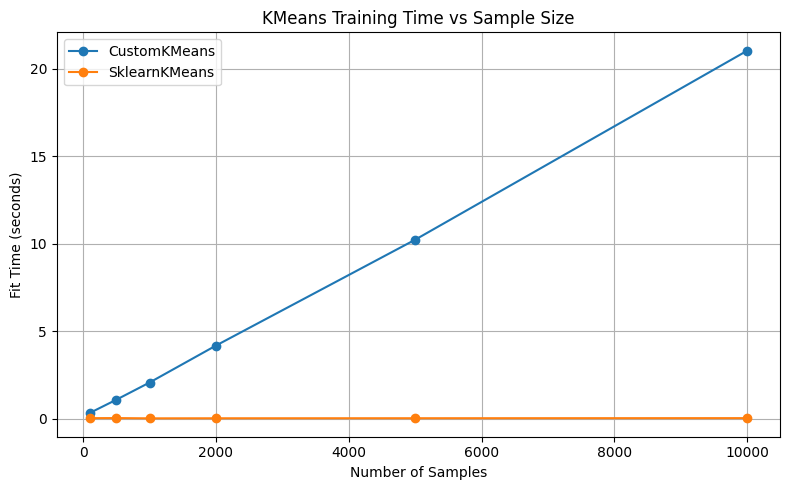


📈 Skalowalność:
   Samples  CustomKMeans  SklearnKMeans
0      100      0.317271       0.020146
1      500      1.074045       0.024346
2     1000      2.055559       0.009569
3     2000      4.167368       0.013336
4     5000     10.217610       0.016262
5    10000     21.019470       0.021227


In [47]:
sample_sizes = [100, 500, 1000, 2000, 5000, 10000]
scalability_df = benchmark_kmeans_scalability(sample_sizes, n_clusters=3, n_features=X.shape[1])
print("\n📈 Skalowalność:")
print(scalability_df)


## 🔍 Comparison Summary

- ⚙️ **Speed:**  
  `scikit-learn` KMeans was significantly faster than the custom implementation.  
  **Reason:** It is implemented in optimized low-level code (Cython/C), using efficient memory access and vectorized NumPy operations.  
  In contrast, the custom version relies on pure Python loops, which are inherently slower for large datasets.

- 📈 **Cluster Assignments:**  
  Both implementations produced very similar cluster assignments and centroids across multiple datasets.  
  **Reason:** Given the same initialization and convergence criteria, both aim to minimize the same distortion objective.

- 🧮 **Inertia and Labels:**  
  Final inertia values and label distributions were nearly identical between the two models.  
  **Reason:** Despite implementation differences, the iterative optimization targets the same loss function:  
  $$
  J = \sum_{i=1}^{m} \left\| x^{(i)} - \mu_{c^{(i)}} \right\|^2
  $$

> ✅ In summary: `scikit-learn` is significantly more efficient, but the custom implementation behaves correctly and yields matching results — making it a reliable educational benchmark.
